In [1]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns;

In [2]:
# Load in data and drop any columns with all NAs

clash = pd.read_csv("CLASH.csv",encoding='utf-8').dropna(how='all',axis='columns')

In [3]:
clash.head()

,Hm0 deep,Tp deep,Tm deep,"Tm-1,0 deep",h deep,m,b,h,Hm0 toe,Tp toe,...,cotaexcl,cotaincl,Rc,B,hb,tanaB,Bh,Ac,Gc,q
0,m,s,s,s,m,NaN,°,m,m,s,...,NaN,NaN,m,m,m,NaN,m,m,m,m3/s/m
1,0.108,1.591,1.326,1.447,0.184,43.0,0,0.033,0.024,1.591,...,0.0,0.0,0.077,0.000,0.000,0.0,0.000,0.061,0.432,1.109E-04
2,0.108,1.591,1.326,1.447,0.193,25.0,0,-0.021,NaN,1.591,...,0.0,0.0,0.068,0.000,0.000,0.0,0.000,0.052,0.432,1.438E-04
3,0.126,2.087,1.739,1.897,0.211,43.0,0,0.060,0.045,2.087,...,0.0,0.0,0.050,0.000,0.000,0.0,0.000,0.034,0.432,5.938E-04
4,0.126,2.087,1.739,1.897,0.211,25.0,0,-0.003,NaN,2.087,...,0.0,0.0,0.050,0.000,0.000,0.0,0.000,0.034,0.432,6.250E-04


In [4]:
clash.columns

Index(['Hm0 deep', 'Tp deep', 'Tm deep', 'Tm-1,0 deep', 'h deep', 'm', 'b',
       'h', 'Hm0 toe', 'Tp toe', 'Tm toe', 'Tm-1,0 toe', 'ht', 'Bt', 'gf',
       'cotad', 'cotau', 'cotaexcl', 'cotaincl', 'Rc', 'B', 'hb', 'tanaB',
       'Bh', 'Ac', 'Gc', 'q'],
      dtype='object')

In [5]:
# Find dimensions/shape of the data
clash.shape

(10533, 27)

In [6]:
# Find number of instances are dropping *any* NAs
print(clash.dropna(how='any',axis='rows').shape)

clash.dropna(how='any',axis='rows',inplace=True)

# Need to reset index after removing entries

clash.index = range(len(clash))

(9992, 27)


In [7]:
clash.head()

,Hm0 deep,Tp deep,Tm deep,"Tm-1,0 deep",h deep,m,b,h,Hm0 toe,Tp toe,...,cotaexcl,cotaincl,Rc,B,hb,tanaB,Bh,Ac,Gc,q
0,0.108,1.591,1.326,1.447,0.184,43.0,0,0.033,0.024,1.591,...,0.0,0.0,0.077,0.000,0.000,0.0,0.000,0.061,0.432,1.109E-04
1,0.126,2.087,1.739,1.897,0.211,43.0,0,0.060,0.045,2.087,...,0.0,0.0,0.050,0.000,0.000,0.0,0.000,0.034,0.432,5.938E-04
2,0.138,2.165,1.804,1.968,0.236,43.0,0,0.085,0.063,2.165,...,0.0,0.0,0.025,0.000,0.000,0.0,0.000,0.009,0.432,2.063E-03
3,0.138,2.165,1.804,1.968,0.236,25.0,0,0.023,0.042,2.165,...,0.0,0.0,0.025,0.000,0.000,0.0,0.000,0.009,0.432,2.078E-03
4,0.108,1.591,1.326,1.447,0.184,43.0,0,0.033,0.024,1.591,...,0.0,0.0,0.152,0.000,0.000,0.0,0.000,0.083,0.432,3.125E-07


In the data there are certain response variables where the data isn't a number and is something like '.' or '-' obviously where we have missing data.

Therefore I needed to remove these. I did this by removing any entry where the first character in the response variable wasn't a number 

In [8]:
drops = []
for i in range(len(clash)):
    if clash.iloc[i,-1][0] not in [str(i) for i in range(10)]:
        drops.append(i)
clash.drop(drops,inplace=True)
clash.index = range(len(clash))

In [9]:
# The response variables are still formatted as strings so need to reformat as numbers

clash['q'] = pd.to_numeric(clash['q'],downcast='float')

In [10]:
clash.head()

,Hm0 deep,Tp deep,Tm deep,"Tm-1,0 deep",h deep,m,b,h,Hm0 toe,Tp toe,...,cotaexcl,cotaincl,Rc,B,hb,tanaB,Bh,Ac,Gc,q
0,0.108,1.591,1.326,1.447,0.184,43.0,0,0.033,0.024,1.591,...,0.0,0.0,0.077,0.000,0.000,0.0,0.000,0.061,0.432,1.109000e-04
1,0.126,2.087,1.739,1.897,0.211,43.0,0,0.060,0.045,2.087,...,0.0,0.0,0.050,0.000,0.000,0.0,0.000,0.034,0.432,5.938000e-04
2,0.138,2.165,1.804,1.968,0.236,43.0,0,0.085,0.063,2.165,...,0.0,0.0,0.025,0.000,0.000,0.0,0.000,0.009,0.432,2.063000e-03
3,0.138,2.165,1.804,1.968,0.236,25.0,0,0.023,0.042,2.165,...,0.0,0.0,0.025,0.000,0.000,0.0,0.000,0.009,0.432,2.078000e-03
4,0.108,1.591,1.326,1.447,0.184,43.0,0,0.033,0.024,1.591,...,0.0,0.0,0.152,0.000,0.000,0.0,0.000,0.083,0.432,3.125000e-07


Next I will look at feature selection of my data.

Using those features determined to have the highest _sensitivity_ scores as calculated by Alireza. 

In [11]:
Scores = pd.read_csv("SensitivityScores.csv",encoding='utf-8').dropna(how='all',axis='columns')

In [12]:
Scores.head()

,Feature,S_{i} (Eq. 8),ST_i(Eq. 8)
0,Hm0 toe,0.221780,0.26317
1,Rc,0.208100,0.24943
2,Tm deep,0.171470,0.21283
3,Tp deep,0.059608,0.10096
4,Ac,0.059495,0.10108


In [13]:
Scores.iloc[:9,:]['Feature']

0        Hm0 toe
1             Rc
2        Tm deep
3        Tp deep
4             Ac
5              B
6             Bh
7    Tm-1,0 deep
8       Hm0 deep
Name: Feature, dtype: object

In [14]:
clash.columns

Index(['Hm0 deep', 'Tp deep', 'Tm deep', 'Tm-1,0 deep', 'h deep', 'm', 'b',
       'h', 'Hm0 toe', 'Tp toe', 'Tm toe', 'Tm-1,0 toe', 'ht', 'Bt', 'gf',
       'cotad', 'cotau', 'cotaexcl', 'cotaincl', 'Rc', 'B', 'hb', 'tanaB',
       'Bh', 'Ac', 'Gc', 'q'],
      dtype='object')

In [15]:
list(set(Scores.iloc[:9,:]['Feature']).intersection(set(clash.columns)))

['B',
 'Hm0 toe',
 'Rc',
 'Tm-1,0 deep',
 'Tm deep',
 'Tp deep',
 'Bh',
 'Hm0 deep',
 'Ac']

In [16]:
X = clash.loc[:,list(set(Scores.iloc[:9,:]['Feature']).intersection(set(clash.columns)))]

In [17]:
y = clash.loc[:,'q']

In [18]:
X

,B,Hm0 toe,Rc,"Tm-1,0 deep",Tm deep,Tp deep,Bh,Hm0 deep,Ac
0,0.000,0.024,0.077,1.447,1.326,1.591,0.000,0.108,0.061
1,0.000,0.045,0.050,1.897,1.739,2.087,0.000,0.126,0.034
2,0.000,0.063,0.025,1.968,1.804,2.165,0.000,0.138,0.009
3,0.000,0.042,0.025,1.968,1.804,2.165,0.000,0.138,0.009
4,0.000,0.024,0.152,1.447,1.326,1.591,0.000,0.108,0.083
...,...,...,...,...,...,...,...,...,...
9974,0.000,0.033,0.095,0.785,0.681,0.753,0.000,0.048,0.095
9975,0.000,0.041,0.095,0.795,0.689,0.914,0.000,0.062,0.095
9976,0.000,0.042,0.095,0.698,0.604,0.731,0.000,0.058,0.095
9977,0.000,0.028,0.095,0.681,0.592,0.826,0.000,0.038,0.095


In [19]:
# Check data types of entries

print(X.dtypes)

B              object
Hm0 toe        object
Rc             object
Tm-1,0 deep    object
Tm deep        object
Tp deep        object
Bh             object
Hm0 deep       object
Ac             object
dtype: object


In [20]:
print(y.dtypes)

float32


Need to convert X data into floats 

In [21]:
X = X.astype('float32')
X.dtypes

B              float32
Hm0 toe        float32
Rc             float32
Tm-1,0 deep    float32
Tm deep        float32
Tp deep        float32
Bh             float32
Hm0 deep       float32
Ac             float32
dtype: object

Saving and outputting data into a .csv file which can then be used in R.

In [109]:
ProcessedData = X
ProcessedData['q'] = y

In [23]:
ProcessedData.to_csv('Processed_data.csv',index=None)

In [24]:
## Change the full data set into floats and export to be used for GBN

clash = clash.astype('float32')
clash.dtypes

Hm0 deep       float32
Tp deep        float32
Tm deep        float32
Tm-1,0 deep    float32
h deep         float32
m              float32
b              float32
h              float32
Hm0 toe        float32
Tp toe         float32
Tm toe         float32
Tm-1,0 toe     float32
ht             float32
Bt             float32
gf             float32
cotad          float32
cotau          float32
cotaexcl       float32
cotaincl       float32
Rc             float32
B              float32
hb             float32
tanaB          float32
Bh             float32
Ac             float32
Gc             float32
q              float32
dtype: object

In [25]:
clash.to_csv('Full_Clash_Dataset.csv',index=None)

In [26]:
clashArr = np.array(clash)

In [27]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.600e+01, 1.300e+01,
        2.200e+01, 1.230e+02, 1.540e+02, 1.610e+02, 4.050e+02, 4.220e+02,
        5.420e+02, 8.300e+02, 6.800e+02, 6.460e+02, 1.085e+03, 9.710e+02,
        8.480e+02, 5.300e+02, 6.890e+02, 3.450e+02, 3.380e+02, 9.700e+01,
        2.210e+02, 1.590e+02, 8.300e+01, 1.160e+02, 3.900e+01, 1.800e+01,
        5.800e+01, 1.100e+01, 2.900e+01, 1.200e+01, 1.900e+01, 7.000e+00,
        1.600e+01, 2.800e+01, 4.100e+01, 1.200e+01, 2.300e+01, 4.300e+01,
        2.600e+01, 1.500e+01, 1.200e+01, 4.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([-0.7031975 , -0.6358948 , -0.56859213, -0.5012894 , -0.43398675,
        -0.36668408, -0.2993814 , -0.23207872, -0.16477604, -0.09747336,
        -0.03017068,  0.037132  ,  0.10443468,  0.17173736,  0.23904005,
         0.30634272,  0.3736454 ,  0.44094807,  0.5082508 ,  0.5755534 ,
         0.6428561 ,  0.7101588 ,  0.77746147,  0.8447642 ,  0.9120668 ,
         0.

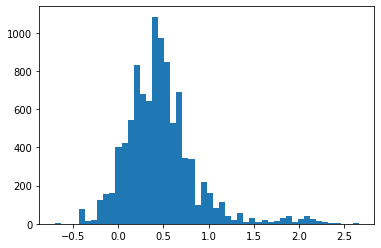

In [28]:
plt.hist(np.log(clashArr[:,3]),bins=50)

In [29]:
ProcessedData.head()

,B,Hm0 toe,Rc,"Tm-1,0 deep",Tm deep,Tp deep,Bh,Hm0 deep,Ac,q
0,0.0,0.024,0.077,1.447,1.326,1.591,0.0,0.108,0.061,1.109000e-04
1,0.0,0.045,0.050,1.897,1.739,2.087,0.0,0.126,0.034,5.938000e-04
2,0.0,0.063,0.025,1.968,1.804,2.165,0.0,0.138,0.009,2.063000e-03
3,0.0,0.042,0.025,1.968,1.804,2.165,0.0,0.138,0.009,2.078000e-03
4,0.0,0.024,0.152,1.447,1.326,1.591,0.0,0.108,0.083,3.125000e-07


In [30]:
clash

,Hm0 deep,Tp deep,Tm deep,"Tm-1,0 deep",h deep,m,b,h,Hm0 toe,Tp toe,...,cotaexcl,cotaincl,Rc,B,hb,tanaB,Bh,Ac,Gc,q
0,0.108,1.591,1.326,1.447,0.184,43.0,0.0,0.033,0.024,1.591,...,0.00,0.00,0.077,0.0,0.0,0.0,0.0,0.061,0.432,1.109000e-04
1,0.126,2.087,1.739,1.897,0.211,43.0,0.0,0.060,0.045,2.087,...,0.00,0.00,0.050,0.0,0.0,0.0,0.0,0.034,0.432,5.938000e-04
2,0.138,2.165,1.804,1.968,0.236,43.0,0.0,0.085,0.063,2.165,...,0.00,0.00,0.025,0.0,0.0,0.0,0.0,0.009,0.432,2.063000e-03
3,0.138,2.165,1.804,1.968,0.236,25.0,0.0,0.023,0.042,2.165,...,0.00,0.00,0.025,0.0,0.0,0.0,0.0,0.009,0.432,2.078000e-03
4,0.108,1.591,1.326,1.447,0.184,43.0,0.0,0.033,0.024,1.591,...,0.00,0.00,0.152,0.0,0.0,0.0,0.0,0.083,0.432,3.125000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,0.048,0.753,0.681,0.785,0.400,40.0,0.0,0.200,0.033,0.985,...,1.69,1.69,0.095,0.0,0.0,0.0,0.0,0.095,0.000,6.060000e-06
9975,0.062,0.914,0.689,0.795,0.400,40.0,0.0,0.200,0.041,0.914,...,1.69,1.69,0.095,0.0,0.0,0.0,0.0,0.095,0.000,2.090000e-05
9976,0.058,0.731,0.604,0.698,0.400,40.0,0.0,0.200,0.042,0.853,...,1.69,1.69,0.095,0.0,0.0,0.0,0.0,0.095,0.000,2.880000e-05
9977,0.038,0.826,0.592,0.681,0.400,40.0,0.0,0.200,0.028,0.853,...,1.69,1.69,0.095,0.0,0.0,0.0,0.0,0.095,0.000,2.400000e-06
